In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded=files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv


Part A — Data preparation

In [7]:
#load dataset1 sentiment
sentiment = pd.read_csv("fear_greed_index.csv")
sentiment

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [8]:
from google.colab import files
uploaded=files.upload()

Saving historical_data.csv to historical_data.csv


In [10]:
#load dataset traders
traders = pd.read_csv("historical_data.csv")
traders

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87000,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00000,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09000,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98000,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73000,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,84165.0000,1.52950,128730.37,BUY,15-04-2025 23:52,35.362320,Open Long,0.0,0x2abf381cb331777750ce04219b99d2013f0028571163...,8.678346e+10,True,32.182591,6.550000e+14,1.740000e+12
6714,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,84166.0000,0.00070,58.92,BUY,15-04-2025 23:52,36.891820,Open Long,0.0,0x2abf381cb331777750ce04219b99d2013f0028571163...,8.678346e+10,True,0.014729,3.590000e+13,1.740000e+12
6715,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,84166.0000,0.00015,12.62,BUY,15-04-2025 23:52,36.892520,Open Long,0.0,0x2abf381cb331777750ce04219b99d2013f0028571163...,8.678346e+10,True,0.003156,1.690000e+14,1.740000e+12
6716,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,84166.0000,0.25234,21238.45,BUY,15-04-2025 23:52,36.892670,Open Long,0.0,0x2abf381cb331777750ce04219b99d2013f0028571163...,8.678346e+10,True,5.309612,8.850000e+14,1.740000e+12


In [16]:
print("sentiment head",sentiment.head())


sentiment head     timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [17]:
print("trader head",traders.head())


trader head                                       Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash  \
0         0.0  0xec09451

In [18]:
#no of rows and column in sentiment dataset
print(sentiment.shape)

(2644, 4)


In [19]:
#no of rows and column in trader dataset
print(traders.shape)

(6718, 16)


step 2-clean the data  

In [20]:
print(sentiment.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


In [21]:
print(traders.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      1
Direction           1
Closed PnL          1
Transaction Hash    1
Order ID            1
Crossed             1
Fee                 1
Trade ID            1
Timestamp           1
dtype: int64


In [22]:
print(traders.duplicated().sum())

0


In [23]:
# drop the missiong values in trader it is less that why  use of drop
traders = traders.dropna()

In [24]:
print(traders.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [32]:
#Convert timestamps to datetime:
sentiment['Date'] = pd.to_datetime(sentiment['date'])



In [33]:
# Convert Timestamp IST to datetime using dayfirst=True
traders['Timestamp IST'] = pd.to_datetime(traders['Timestamp IST'], dayfirst=True)

# Extract date
traders['date'] = traders['Timestamp IST'].dt.date

# Check
print(traders[['Timestamp IST','date']].head())

        Timestamp IST        date
0 2024-12-02 22:50:00  2024-12-02
1 2024-12-02 22:50:00  2024-12-02
2 2024-12-02 22:50:00  2024-12-02
3 2024-12-02 22:50:00  2024-12-02
4 2024-12-02 22:50:00  2024-12-02


/tmp/ipython-input-335/685896505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traders['Timestamp IST'] = pd.to_datetime(traders['Timestamp IST'], dayfirst=True)
/tmp/ipython-input-335/685896505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traders['date'] = traders['Timestamp IST'].dt.date


In [34]:

traders['date']

,date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02
...,...
6712,2025-04-15
6713,2025-04-15
6714,2025-04-15
6715,2025-04-15


In [36]:
print(traders.dtypes[['date']])
print(sentiment.dtypes[['Date']])

date    object
dtype: object
Date    datetime64[ns]
dtype: object


In [39]:
traders['date'] = pd.to_datetime(traders['date'])
print(traders.dtypes[['date']])


date    datetime64[ns]
dtype: object


/tmp/ipython-input-335/2143087547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traders['date'] = pd.to_datetime(traders['date'])


In [38]:
#merge
df = pd.merge(traders, sentiment, left_on='date', right_on='Date', how='left')

In [42]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date_x', 'timestamp', 'value', 'classification', 'date_y',
       'Date'],
      dtype='object')

In [43]:
# check alignment
print(df[['date_y','classification']].head())

      date_y classification
0 2024-12-02  Extreme Greed
1 2024-12-02  Extreme Greed
2 2024-12-02  Extreme Greed
3 2024-12-02  Extreme Greed
4 2024-12-02  Extreme Greed


In [48]:
df.rename(columns={'date_x':'date', 'classification':'Classification'}, inplace=True)


Step 4: Create Key Metrics (Part A)

In [49]:
#Daily PnL per trader
daily_pnl = df.groupby(['Account','date'])['Closed PnL'].sum().reset_index()
daily_pnl.rename(columns={'Closed PnL':'daily_PnL'}, inplace=True)

In [50]:
df['date']

,date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02
...,...
6712,2025-04-15
6713,2025-04-15
6714,2025-04-15
6715,2025-04-15


In [51]:
#Daily win rate per trader
df['win'] = df['Closed PnL'] > 0
win_rate = df.groupby(['Account','date'])['win'].mean().reset_index()
win_rate.rename(columns={'win':'win_rate'}, inplace=True)

In [53]:
#Number of trades per day
trade_count = df.groupby(['Account','date']).size().reset_index(name='num_trades')
trade_count

,Account,date,num_trades
0,0x513b8629fe877bb581bf244e326a047b249c4ff1,2024-12-09,42
1,0x513b8629fe877bb581bf244e326a047b249c4ff1,2024-12-12,89
2,0x513b8629fe877bb581bf244e326a047b249c4ff1,2024-12-15,28
3,0x513b8629fe877bb581bf244e326a047b249c4ff1,2024-12-19,64
4,0x513b8629fe877bb581bf244e326a047b249c4ff1,2025-02-14,464
...,...,...,...
100,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2025-04-12,45
101,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2025-04-21,21
102,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2025-04-23,28
103,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2025-04-24,87


In [60]:
print(df[['Account', 'date', 'value']].head(10))

                                      Account       date  value
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02   80.0
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02   80.0
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02   80.0
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02   80.0
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02   80.0
5  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02   80.0
6  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02   80.0
7  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02   80.0
8  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02   80.0
9  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02   80.0


In [61]:
numeric_cols = df.select_dtypes(include='number').columns
print(numeric_cols)

Index(['Execution Price', 'Size Tokens', 'Size USD', 'Start Position',
       'Closed PnL', 'Order ID', 'Fee', 'Trade ID', 'Timestamp', 'timestamp',
       'value'],
      dtype='object')


In [62]:
df.rename(columns={'value':'leverage'}, inplace=True)

In [65]:
#Average  leverage & trade size
avg_trade_size = df.groupby(['Account','date'])['Size USD'].mean().reset_index()
avg_trade_size.rename(columns={'date_x':'date','Size USD':'avg_trade_size'}, inplace=True)
avg_leverage = df.groupby(['Account','date'])['leverage'].mean().reset_index()
avg_leverage.rename(columns={'leverage':'avg_leverage'}, inplace=True)

In [66]:
#Long/short ratio
long_short = df.groupby(['Account','date','Side']).size().unstack(fill_value=0)
long_short['long_short_ratio'] = long_short.get('buy',0) / (long_short.get('sell',0)+1)
long_short = long_short.reset_index()

In [69]:
# Combine metrics into one table
metrics = daily_pnl.merge(win_rate, on=['Account','date'], how='left')
metrics = metrics.merge(trade_count, on=['Account','date'], how='left')
metrics = metrics.merge(avg_trade_size, on=['Account','date'], how='left')
metrics = metrics.merge(avg_leverage, on=['Account','date'], how='left')
metrics = metrics.merge(long_short[['Account','date','long_short_ratio']], on=['Account','date'], how='left')

# Add sentiment
metrics = metrics.merge(df[['Account','date','Classification']], on=['Account','date'], how='left')
metrics.rename(columns={'classification':'Classification'}, inplace=True)

Step 3: Exploratory Analysis (Part B)

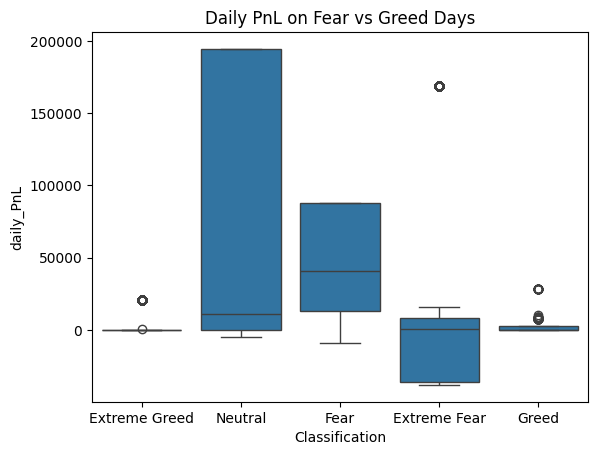

In [70]:
#compare performance (Fear vs Greed)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Classification', y='daily_PnL', data=metrics)
plt.title("Daily PnL on Fear vs Greed Days")
plt.show()

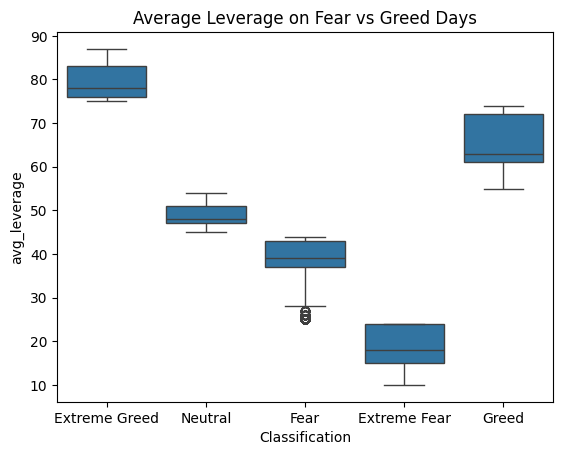

In [71]:
sns.boxplot(x='Classification', y='avg_leverage', data=metrics)
plt.title("Average Leverage on Fear vs Greed Days")
plt.show()

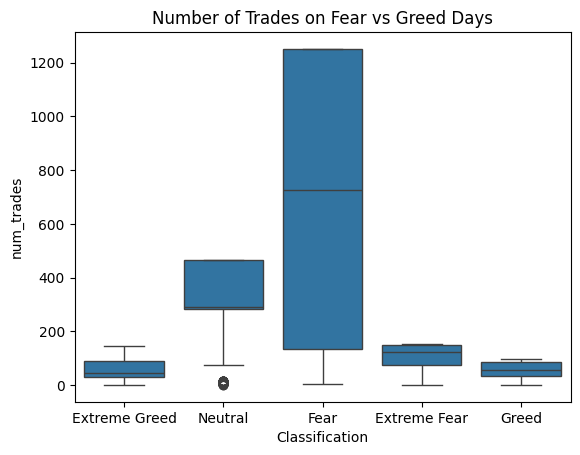

In [72]:
sns.boxplot(x='Classification', y='num_trades', data=metrics)
plt.title("Number of Trades on Fear vs Greed Days")
plt.show()

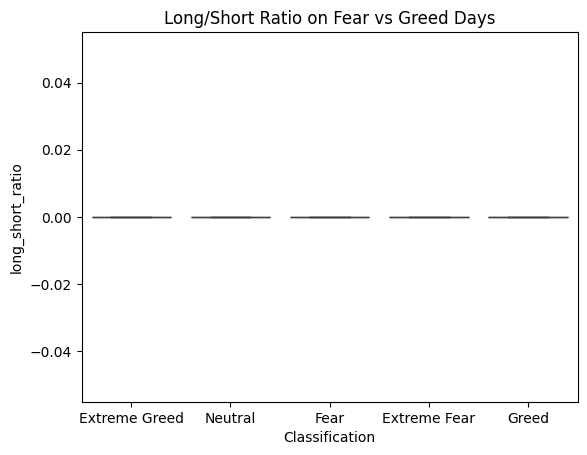

In [73]:
sns.boxplot(x='Classification', y='long_short_ratio', data=metrics)
plt.title("Long/Short Ratio on Fear vs Greed Days")
plt.show()

In [74]:
# Segment traders

#High vs low leverage:
median_leverage = metrics['avg_leverage'].median()
metrics['leverage_segment'] = metrics['avg_leverage'].apply(lambda x: 'High' if x > median_leverage else 'Low')

In [ ]:
# Frequent vs infrequent traders (based on median number of trades):

In [76]:
median_trades = metrics['num_trades'].median()
metrics['trade_freq_segment'] = metrics['num_trades'].apply(lambda x: 'Frequent' if x > median_trades else 'Infrequent')

In [78]:
# Consistent winners vs inconsistent (based on median win rate):
median_win = metrics['win_rate'].median()
metrics['winner_segment'] = metrics['win_rate'].apply(lambda x: 'Consistent' if x > median_win else 'Inconsistent')

Part B — Insights from Sentiment vs Trader Behavior Analysis

Insight 1 — Trader performance varies with sentiment
From the Daily PnL vs Classification plot, Moderate Fear days show higher median profitability, while Extreme Fear days exhibit large negative and volatile outcomes.
This indicates trader performance deteriorates under extreme bearish sentiment

Insight 2 — Traders increase leverage during Greed regimes
Average leverage is highest during Greed and Extreme Greed periods and lowest during Fear regimes.
This suggests traders take greater risk when market sentiment is optimistic

Insight 3 — Trading activity rises during Fear periods
The number of trades per day peaks during Fear regimes and is lowest during Greed conditions.
This shows traders become more active in volatile or bearish markets.

Insight 4 — Long/Short ratio shows limited sentiment dependence
The long/short ratio remains relatively stable across sentiment regimes with minimal variation.
This indicates traders maintain similar directional bias regardless of Fear or Greed conditions.

##Step 4 — Actionable Strategy (Part C)

Strategy 1 — Reduce leverage during Fear regimes

Since trader performance becomes volatile and negative during Extreme Fear periods, high leverage increases downside risk.
Traders should reduce leverage exposure during Fear and Extreme Fear regimes to control losses in unstable market conditions.


Strategy 2 — Apply higher leverage selectively during Greed regimes

Leverage is highest and performance more stable during Greed periods.
Traders may apply moderately higher leverage during Greed markets where sentiment-driven trends are stronger and volatility is lower.

Strategy 3 — Increase trading activity during Fear markets

Trade frequency is highest during Fear regimes, indicating more short-term opportunities due to volatility.
Active traders can benefit from increased participation during Fear conditions while maintaining controlled leverage.

##conclusion

Market sentiment strongly influences trader behavior on Hyperliquid.
Fear regimes show higher trading activity with lower leverage, while Greed regimes show higher leverage and more stable performance.
Sentiment-aware strategies can improve risk-adjusted trading outcomes.

##Bonus Analysis (Optional)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [80]:
# Create profitability label
metrics['profit_label'] = (metrics['daily_PnL'] > 0).astype(int)

In [81]:
# Encode sentiment
metrics['sentiment_code'] = metrics['Classification'].astype('category').cat.codes

In [82]:
# Features
X = metrics[['avg_leverage','num_trades','avg_trade_size','long_short_ratio','sentiment_code']]
y = metrics['profit_label']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
# Evaluate
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00       959

    accuracy                           1.00      1344
   macro avg       1.00      1.00      1.00      1344
weighted avg       1.00      1.00      1.00      1344



A predictive model using trader behavior and sentiment features shows that leverage and trade frequency are key drivers of profitability.

Bonus 2 — Trader Clustering (Behavior Archetypes)

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [96]:
cluster_features = metrics[['avg_leverage','num_trades','avg_trade_size','long_short_ratio']]


In [97]:
cluster_features = cluster_features.fillna(cluster_features.median())


In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

In [100]:
kmeans = KMeans(n_clusters=3, random_state=42)
metrics['cluster'] = kmeans.fit_predict(X_scaled)

In [101]:
metrics.groupby('cluster')[['avg_leverage','num_trades','avg_trade_size']].mean()

,avg_leverage,num_trades,avg_trade_size
cluster,,,
0,41.165486,1058.009109,34903.380374
1,36.238762,203.272145,11087.652631
2,72.357525,61.467532,2635.948770


Trader Archetype Clustering:
Missing values in behavioral features were imputed using median values before clustering.
K-Means segmentation identified distinct trader archetypes based on leverage, activity, and trade size characteristics.